# Predicting the Winning Football Team

- Sports betting is a 500 billion dollar market (Sydney Herald)

- Football is played by 250 million players in over 200 countries (most popular sport globally).
- The English Premier League is the most popular domestic team in the world.
- Design a predictive model capable of accurately predicting if the home team will win a football match?


**Discription of Dataset**


**A prediction system was built to predict whether a home team will win it's match or not.**

Key to results data:

- Div = League Division
- Date = Match Date (dd/mm/yy)
- Time = Time of match kick-off
- HomeTeam = Home Team
- Away team = Away Team
- FTHG and HG = Full Time Home Team Goals
- FTAG and AG = Full-Time Away Team Goals
- FTR and Res = Full-Time Result (H=Home Win, D=Draw, A=Away Win)
- HTHG = Half Time Home Team Goals
- HTAG = Half Time Away Team Goals
- HTR = Half Time Result (H=Home Win, D=Draw, A=Away Win)

Match Statistics (where available)

- Attendance = Crowd Attendance
- Referee = Match Referee
- HS = Home Team Shots
- AS = Away Team Shots
- HST = Home Team Shots on Target
- AST = Away Team Shots on Target
- HHW = Home Team Hit Woodwork
- AHW = Away Team Hit Woodwork
- HC = Home Team Corners
- AC = Away Team Corners
- HF = Home Team Fouls Committed
- AF = Away Team Fouls Committed
- HFKC = Home Team Free Kicks Conceded
- AFKC = Away Team Free Kicks Conceded
- HO = Home Team Offsides
- AO = Away Team Offsides
- HY = Home Team Yellow Cards
- AY = Away Team Yellow Cards
  \*HR = Home Team Red Cards
  AR = Away Team Red Cards
  HBP = Home Team Bookings Points (10 = yellow, 25 = red)
  ABP = Away Team Bookings Points (10 = yellow, 25 = red)


### Importing the dataset


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime as dt
import itertools

%matplotlib inline

In [2]:
# Read data from the CSV into a dataframe
folder='../Datasets/'
raw_data_1 = pd.read_csv(folder +'2000-01.csv')
raw_data_2 = pd.read_csv(folder +'2001-02.csv')
raw_data_3 = pd.read_csv(folder +'2002-03.csv')
raw_data_4 = pd.read_csv(folder +'2003-04.csv')
raw_data_5 = pd.read_csv(folder +'2004-05.csv')
raw_data_6 = pd.read_csv(folder +'2005-06.csv')
raw_data_7 = pd.read_csv(folder +'2006-07.csv')
raw_data_8 = pd.read_csv(folder +'2007-08.csv')
raw_data_9 = pd.read_csv(folder +'2008-09.csv')
raw_data_10 = pd.read_csv(folder +'2009-10.csv')
raw_data_11 = pd.read_csv(folder +'2010-11.csv')
raw_data_12 = pd.read_csv(folder +'2011-12.csv')
raw_data_13 = pd.read_csv(folder +'2012-13.csv')
raw_data_14 = pd.read_csv(folder +'2013-14.csv')
raw_data_15 = pd.read_csv(folder +'2014-15.csv')
raw_data_16 = pd.read_csv(folder +'2015-16.csv')
raw_data_17 = pd.read_csv(folder +'2016-17.csv')
raw_data_18 = pd.read_csv(folder +'2017-18.csv')
raw_data_19 = pd.read_csv(folder +'2018-19.csv')
raw_data_20 = pd.read_csv(folder +'2019-20.csv')


## **Self Implemented Code**


In [3]:
# Print all the columns from all the dataframes

dataframes = [raw_data_1, raw_data_2, raw_data_3, raw_data_4, raw_data_5,
             raw_data_6, raw_data_7, raw_data_8, raw_data_9, raw_data_10,
             raw_data_11, raw_data_12, raw_data_13, raw_data_14, raw_data_15,
             raw_data_16, raw_data_17, raw_data_18, raw_data_19, raw_data_20]

for df in dataframes:
    print(df.columns.tolist())

['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG', 'HTR', 'Attendance', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HHW', 'AHW', 'HC', 'AC', 'HF', 'AF', 'HO', 'AO', 'HY', 'AY', 'HR', 'AR']
['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG', 'HTR', 'Attendance', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HHW', 'AHW', 'HC', 'AC', 'HF', 'AF', 'HO', 'AO', 'HY', 'AY', 'HR', 'AR']
['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR']
['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR']
['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR']
['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'H

In [4]:

#Gets all the statistics related to gameplay
                      
columns_req = ['Date','HomeTeam','AwayTeam','FTHG','FTAG','FTR']

playing_statistics_1 = raw_data_1[columns_req]                      
playing_statistics_2 = raw_data_2[columns_req]
playing_statistics_3 = raw_data_3[columns_req]
playing_statistics_4 = raw_data_4[columns_req]
playing_statistics_5 = raw_data_5[columns_req]
playing_statistics_6 = raw_data_6[columns_req]
playing_statistics_7 = raw_data_7[columns_req]
playing_statistics_8 = raw_data_8[columns_req]
playing_statistics_9 = raw_data_9[columns_req]
playing_statistics_10 = raw_data_10[columns_req]
playing_statistics_11 = raw_data_11[columns_req]   
playing_statistics_12 = raw_data_12[columns_req]
playing_statistics_13 = raw_data_13[columns_req]
playing_statistics_14 = raw_data_14[columns_req]
playing_statistics_15 = raw_data_15[columns_req]
playing_statistics_16 = raw_data_16[columns_req]
playing_statistics_17 = raw_data_17[columns_req]
playing_statistics_18 = raw_data_18[columns_req]
playing_statistics_19 = raw_data_19[columns_req]
playing_statistics_20 = raw_data_20[columns_req]

**GOALS SCORED AND CONCEDED AT THE END OF MATCHWEEK, ARRANGED BY TEAMS AND MATCHWEEK**


In [5]:
# Gets the goals scored agg arranged by teams and matchweek
def get_goals_scored(playing_stat):
    # Create a dictionary with team names as keys
    teams = {}
    for i in playing_stat['HomeTeam'].unique():
        teams[i] = []
    
    # the value corresponding to keys is a list containing the match location.
    for i in range(len(playing_stat)):
        HTGS = playing_stat.iloc[i]['FTHG']
        ATGS = playing_stat.iloc[i]['FTAG']
        teams[playing_stat.iloc[i].HomeTeam].append(HTGS)
        teams[playing_stat.iloc[i].AwayTeam].append(ATGS)
    
    # Calculate number of matchweeks based on total matches and teams
    num_teams = len(playing_stat['HomeTeam'].unique())
    matches_per_team = len(teams[list(teams.keys())[0]])
    
    # Create a dataframe for goals scored where rows are teams and cols are matchweek.
    GoalsScored = pd.DataFrame(data=teams, index = [i for i in range(1, matches_per_team + 1)]).T
    GoalsScored[0] = 0
    # Aggregate to get uptil that point
    for i in range(2, matches_per_team + 1):
        GoalsScored[i] = GoalsScored[i] + GoalsScored[i-1]
    return GoalsScored

# Gets the goals conceded agg arranged by teams and matchweek
def get_goals_conceded(playing_stat):
    # Create a dictionary with team names as keys
    teams = {}
    for i in playing_stat['HomeTeam'].unique():
        teams[i] = []
    
    # the value corresponding to keys is a list containing the match location.
    for i in range(len(playing_stat)):
        ATGC = playing_stat.iloc[i]['FTHG']
        HTGC = playing_stat.iloc[i]['FTAG']
        teams[playing_stat.iloc[i].HomeTeam].append(HTGC)
        teams[playing_stat.iloc[i].AwayTeam].append(ATGC)
    
    # Calculate number of matchweeks based on total matches and teams
    num_teams = len(playing_stat['HomeTeam'].unique())
    matches_per_team = len(teams[list(teams.keys())[0]])
    
    # Create a dataframe for goals conceded where rows are teams and cols are matchweek.
    GoalsConceded = pd.DataFrame(data=teams, index = [i for i in range(1, matches_per_team + 1)]).T
    GoalsConceded[0] = 0
    # Aggregate to get uptil that point
    for i in range(2, matches_per_team + 1):
        GoalsConceded[i] = GoalsConceded[i] + GoalsConceded[i-1]
    return GoalsConceded
    
def get_gss(playing_stat):
    GC = get_goals_conceded(playing_stat)
    GS = get_goals_scored(playing_stat)
   
    j = 0
    HTGS = []
    ATGS = []
    HTGC = []
    ATGC = []

    num_teams = len(playing_stat['HomeTeam'].unique())
    matches_per_round = num_teams // 2
    total_matches = len(playing_stat)

    for i in range(total_matches):
        ht = playing_stat.iloc[i].HomeTeam
        at = playing_stat.iloc[i].AwayTeam
        HTGS.append(GS.loc[ht][j])
        ATGS.append(GS.loc[at][j])
        HTGC.append(GC.loc[ht][j])
        ATGC.append(GC.loc[at][j])
        
        if ((i + 1) % matches_per_round) == 0:
            j = j + 1
        
    playing_stat['HTGS'] = HTGS
    playing_stat['ATGS'] = ATGS
    playing_stat['HTGC'] = HTGC
    playing_stat['ATGC'] = ATGC
    
    return playing_stat

# Apply to each dataset
playing_statistics_1 = get_gss(playing_statistics_1)
playing_statistics_2 = get_gss(playing_statistics_2)
playing_statistics_3 = get_gss(playing_statistics_3)
playing_statistics_4 = get_gss(playing_statistics_4)
playing_statistics_5 = get_gss(playing_statistics_5)
playing_statistics_6 = get_gss(playing_statistics_6)
playing_statistics_7 = get_gss(playing_statistics_7)
playing_statistics_8 = get_gss(playing_statistics_8)
playing_statistics_9 = get_gss(playing_statistics_9)
playing_statistics_10 = get_gss(playing_statistics_10)
playing_statistics_11 = get_gss(playing_statistics_11)
playing_statistics_12 = get_gss(playing_statistics_12)
playing_statistics_13 = get_gss(playing_statistics_13)
playing_statistics_14 = get_gss(playing_statistics_14)
playing_statistics_15 = get_gss(playing_statistics_15)
playing_statistics_16 = get_gss(playing_statistics_16)
playing_statistics_17 = get_gss(playing_statistics_17)
playing_statistics_18 = get_gss(playing_statistics_18)
playing_statistics_19 = get_gss(playing_statistics_19)
playing_statistics_20 = get_gss(playing_statistics_20)


/tmp/ipykernel_19100/3226335908.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playing_stat['HTGS'] = HTGS
/tmp/ipykernel_19100/3226335908.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playing_stat['ATGS'] = ATGS
/tmp/ipykernel_19100/3226335908.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

**GET RESPECTIVE POINTS**


In [6]:
def get_points(result):
    if result == 'W':
        return 3
    elif result == 'D':
        return 1
    else:
        return 0
    

def get_cuml_points(matchres):
    matchres_points = matchres.applymap(get_points)
    # Get the actual number of columns (matchweeks) in the data
    num_matchweeks = len(matchres.columns)
    for i in range(2, num_matchweeks + 1):
        matchres_points[i] = matchres_points[i] + matchres_points[i-1]
    
    # Get the number of teams from the matchres DataFrame
    num_teams = len(matchres)
    matchres_points.insert(column=0, loc=0, value=[0 for i in range(num_teams)])
    return matchres_points
def get_matchres(playing_stat):
    # Create a dictionary with team names as keys
    teams = {}
    for i in playing_stat['HomeTeam'].unique():
        teams[i] = []

    # the value corresponding to keys is a list containing the match result
    for i in range(len(playing_stat)):
        if playing_stat.iloc[i].FTR == 'H':
            teams[playing_stat.iloc[i].HomeTeam].append('W')
            teams[playing_stat.iloc[i].AwayTeam].append('L')
        elif playing_stat.iloc[i].FTR == 'A':
            teams[playing_stat.iloc[i].AwayTeam].append('W')
            teams[playing_stat.iloc[i].HomeTeam].append('L')
        else:
            teams[playing_stat.iloc[i].AwayTeam].append('D')
            teams[playing_stat.iloc[i].HomeTeam].append('D')
    
    # Calculate the actual number of matchweeks based on matches per team
    num_teams = len(playing_stat['HomeTeam'].unique())
    matches_per_team = len(teams[list(teams.keys())[0]])
    
    # Create a dataframe for match results where rows are teams and cols are matchweek
    matchres = pd.DataFrame(data=teams, index=[i for i in range(1, matches_per_team + 1)]).T
    return matchres
def get_agg_points(playing_stat):
    matchres = get_matchres(playing_stat)
    cum_pts = get_cuml_points(matchres)
    HTP = []
    ATP = []
    j = 0
    
    # Calculate matches per round dynamically
    num_teams = len(playing_stat['HomeTeam'].unique())
    matches_per_round = num_teams // 2
    total_matches = len(playing_stat)
    
    for i in range(total_matches):
        ht = playing_stat.iloc[i].HomeTeam
        at = playing_stat.iloc[i].AwayTeam
        HTP.append(cum_pts.loc[ht][j])
        ATP.append(cum_pts.loc[at][j])

        if ((i + 1) % matches_per_round) == 0:
            j = j + 1
            
    playing_stat['HTP'] = HTP
    playing_stat['ATP'] = ATP
    return playing_stat
    
# Apply to each dataset
playing_statistics_1 = get_agg_points(playing_statistics_1)
playing_statistics_2 = get_agg_points(playing_statistics_2)
playing_statistics_3 = get_agg_points(playing_statistics_3)
playing_statistics_4 = get_agg_points(playing_statistics_4)
playing_statistics_5 = get_agg_points(playing_statistics_5)
playing_statistics_6 = get_agg_points(playing_statistics_6)
playing_statistics_7 = get_agg_points(playing_statistics_7)
playing_statistics_8 = get_agg_points(playing_statistics_8)
playing_statistics_9 = get_agg_points(playing_statistics_9)
playing_statistics_10 = get_agg_points(playing_statistics_10)
playing_statistics_11 = get_agg_points(playing_statistics_11)
playing_statistics_12 = get_agg_points(playing_statistics_12)
playing_statistics_13 = get_agg_points(playing_statistics_13)
playing_statistics_14 = get_agg_points(playing_statistics_14)
playing_statistics_15 = get_agg_points(playing_statistics_15)
playing_statistics_16 = get_agg_points(playing_statistics_16)
playing_statistics_17 = get_agg_points(playing_statistics_17)
playing_statistics_18 = get_agg_points(playing_statistics_18)
playing_statistics_19 = get_agg_points(playing_statistics_19)
playing_statistics_20 = get_agg_points(playing_statistics_20)

/tmp/ipykernel_19100/3296286409.py:11: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  matchres_points = matchres.applymap(get_points)
/tmp/ipykernel_19100/3296286409.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playing_stat['HTP'] = HTP
/tmp/ipykernel_19100/3296286409.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playing_stat['ATP'] = ATP
/tmp/ipykernel_19100/3296286409.py:11: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead

In [7]:
def get_cuml_points(matchres):
    matchres_points = matchres.applymap(get_points)
    for i in range(2,39):
        matchres_points[i] = matchres_points[i] + matchres_points[i-1]
    
    # Get the number of teams from the matchres DataFrame
    num_teams = len(matchres)
    matchres_points.insert(column=0, loc=0, value=[0 for i in range(num_teams)])
    return matchres_points

**GET TEAM FORM:**


In [8]:
def get_form(playing_stat,num):
    form = get_matchres(playing_stat)
    form_final = form.copy()
    
    # Calculate the actual number of matchweeks dynamically
    num_teams = len(playing_stat['HomeTeam'].unique())
    matches_per_team = len(playing_stat) // num_teams
    max_matchweeks = matches_per_team + 1  # +1 because we start from matchweek 1
    
    for i in range(num, max_matchweeks):
        form_final[i] = ''
        j = 1
        while j <= num:
            if (i-j) in form.columns:  # Check if column exists
                form_final[i] += form[i-j]
            j += 1           
    return form_final

def add_form(playing_stat,num):
    form = get_form(playing_stat,num)
    
    # Calculate matches per round dynamically
    num_teams = len(playing_stat['HomeTeam'].unique())
    matches_per_round = num_teams // 2
    total_matches = len(playing_stat)
    
    h = ['M' for i in range(num * matches_per_round)]  # since form is not available for n MW
    a = ['M' for i in range(num * matches_per_round)]
    
    j = num
    for i in range((num * matches_per_round), total_matches):
        ht = playing_stat.iloc[i].HomeTeam
        at = playing_stat.iloc[i].AwayTeam
        
        past = form.loc[ht][j]               # get past n results
        if len(past) >= num:
            h.append(past[0])                    # 0 index is most recent (first character)
        else:
            h.append('M')
        
        past = form.loc[at][j]               # get past n results.
        if len(past) >= num:
            a.append(past[0])                   # 0 index is most recent (first character)
        else:
            a.append('M')
        
        if ((i + 1) % matches_per_round) == 0:
            j = j + 1

    playing_stat['HM' + str(num)] = h                 
    playing_stat['AM' + str(num)] = a

    return playing_stat

def add_form_df(playing_statistics):
    playing_statistics = add_form(playing_statistics,1)
    playing_statistics = add_form(playing_statistics,2)
    playing_statistics = add_form(playing_statistics,3)
    playing_statistics = add_form(playing_statistics,4)
    playing_statistics = add_form(playing_statistics,5)
    return playing_statistics    
    
# Make changes to df
playing_statistics_1 = add_form_df(playing_statistics_1)
playing_statistics_2 = add_form_df(playing_statistics_2)
playing_statistics_3 = add_form_df(playing_statistics_3)
playing_statistics_4 = add_form_df(playing_statistics_4)
playing_statistics_5 = add_form_df(playing_statistics_5)
playing_statistics_6 = add_form_df(playing_statistics_6)
playing_statistics_7 = add_form_df(playing_statistics_7)
playing_statistics_8 = add_form_df(playing_statistics_8)
playing_statistics_9 = add_form_df(playing_statistics_9)
playing_statistics_10 = add_form_df(playing_statistics_10)
playing_statistics_11 = add_form_df(playing_statistics_11)
playing_statistics_12 = add_form_df(playing_statistics_12)
playing_statistics_13 = add_form_df(playing_statistics_13)
playing_statistics_14 = add_form_df(playing_statistics_14)
playing_statistics_15 = add_form_df(playing_statistics_15)
playing_statistics_16 = add_form_df(playing_statistics_16)
playing_statistics_17 = add_form_df(playing_statistics_17)
playing_statistics_18 = add_form_df(playing_statistics_18)
playing_statistics_19 = add_form_df(playing_statistics_19)
playing_statistics_20 = add_form_df(playing_statistics_20)

/tmp/ipykernel_19100/61553463.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playing_stat['HM' + str(num)] = h
/tmp/ipykernel_19100/61553463.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playing_stat['AM' + str(num)] = a
/tmp/ipykernel_19100/61553463.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guid

In [9]:
# Rearranging columns
cols = ['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTGS', 'ATGS', 'HTGC', 'ATGC', 'HTP', 'ATP', 'HM1', 'HM2', 'HM3',
        'HM4', 'HM5', 'AM1', 'AM2', 'AM3', 'AM4', 'AM5' ]

playing_statistics_1 = playing_statistics_1[cols]
playing_statistics_2 = playing_statistics_2[cols]
playing_statistics_3 = playing_statistics_3[cols]
playing_statistics_4 = playing_statistics_4[cols]
playing_statistics_5 = playing_statistics_5[cols]
playing_statistics_6 = playing_statistics_6[cols]
playing_statistics_7 = playing_statistics_7[cols]
playing_statistics_8 = playing_statistics_8[cols]
playing_statistics_9 = playing_statistics_9[cols]
playing_statistics_10 = playing_statistics_10[cols]
playing_statistics_11 = playing_statistics_11[cols]
playing_statistics_12 = playing_statistics_12[cols]
playing_statistics_13 = playing_statistics_13[cols]
playing_statistics_14 = playing_statistics_14[cols]
playing_statistics_15 = playing_statistics_15[cols]
playing_statistics_16 = playing_statistics_16[cols]
playing_statistics_17 = playing_statistics_17[cols]
playing_statistics_18 = playing_statistics_18[cols]
playing_statistics_19 = playing_statistics_19[cols]
playing_statistics_20 = playing_statistics_20[cols]


**Get MatchWeek:**


In [11]:
def get_mw(playing_stat):
    j = 1
    MatchWeek = []
    num_matches = len(playing_stat)
    matches_per_week = 10  # Premier League typically has 10 matches per week
    
    for i in range(num_matches):
        MatchWeek.append(j)
        if ((i + 1) % matches_per_week) == 0:
            j = j + 1
    playing_stat['MW'] = MatchWeek
    return playing_stat

playing_statistics_1 = get_mw(playing_statistics_1)
playing_statistics_2 = get_mw(playing_statistics_2)
playing_statistics_3 = get_mw(playing_statistics_3)
playing_statistics_4 = get_mw(playing_statistics_4)
playing_statistics_5 = get_mw(playing_statistics_5)
playing_statistics_6 = get_mw(playing_statistics_6)
playing_statistics_7 = get_mw(playing_statistics_7)
playing_statistics_8 = get_mw(playing_statistics_8)
playing_statistics_9 = get_mw(playing_statistics_9)
playing_statistics_10 = get_mw(playing_statistics_10)
playing_statistics_11 = get_mw(playing_statistics_11)
playing_statistics_12 = get_mw(playing_statistics_12)
playing_statistics_13 = get_mw(playing_statistics_13)
playing_statistics_14 = get_mw(playing_statistics_14)
playing_statistics_15 = get_mw(playing_statistics_15)
playing_statistics_16 = get_mw(playing_statistics_16)
playing_statistics_17 = get_mw(playing_statistics_17)
playing_statistics_18 = get_mw(playing_statistics_18)
playing_statistics_19 = get_mw(playing_statistics_19)
playing_statistics_20 = get_mw(playing_statistics_20)

**FINAL DATAFRAME**


In [12]:
playing_stat = pd.concat([playing_statistics_1,
                          playing_statistics_2,
                          playing_statistics_3,
                          playing_statistics_4,
                          playing_statistics_5,
                          playing_statistics_6,
                          playing_statistics_7,
                          playing_statistics_8,
                          playing_statistics_9,
                          playing_statistics_10,
                          playing_statistics_11,
                          playing_statistics_12,
                          playing_statistics_13,
                          playing_statistics_14,
                          playing_statistics_15,
                          playing_statistics_16,
                          playing_statistics_17,
                          playing_statistics_18,
                          playing_statistics_19,
                          playing_statistics_20
                          ], ignore_index=True)


# Gets the form points.
def get_form_points(string):
    sum = 0
    for letter in string:
        sum += get_points(letter)
    return sum

playing_stat['HTFormPtsStr'] = playing_stat['HM1'] + playing_stat['HM2'] + playing_stat['HM3'] + playing_stat['HM4'] + playing_stat['HM5']
playing_stat['ATFormPtsStr'] = playing_stat['AM1'] + playing_stat['AM2'] + playing_stat['AM3'] + playing_stat['AM4'] + playing_stat['AM5']

playing_stat['HTFormPts'] = playing_stat['HTFormPtsStr'].apply(get_form_points)
playing_stat['ATFormPts'] = playing_stat['ATFormPtsStr'].apply(get_form_points)

# Identify Win/Loss Streaks if any.
def get_3game_ws(string):
    if string[-3:] == 'WWW':
        return 1
    else:
        return 0
    
def get_5game_ws(string):
    if string == 'WWWWW':
        return 1
    else:
        return 0
    
def get_3game_ls(string):
    if string[-3:] == 'LLL':
        return 1
    else:
        return 0
    
def get_5game_ls(string):
    if string == 'LLLLL':
        return 1
    else:
        return 0
    
playing_stat['HTWinStreak3'] = playing_stat['HTFormPtsStr'].apply(get_3game_ws)
playing_stat['HTWinStreak5'] = playing_stat['HTFormPtsStr'].apply(get_5game_ws)
playing_stat['HTLossStreak3'] = playing_stat['HTFormPtsStr'].apply(get_3game_ls)
playing_stat['HTLossStreak5'] = playing_stat['HTFormPtsStr'].apply(get_5game_ls)

playing_stat['ATWinStreak3'] = playing_stat['ATFormPtsStr'].apply(get_3game_ws)
playing_stat['ATWinStreak5'] = playing_stat['ATFormPtsStr'].apply(get_5game_ws)
playing_stat['ATLossStreak3'] = playing_stat['ATFormPtsStr'].apply(get_3game_ls)
playing_stat['ATLossStreak5'] = playing_stat['ATFormPtsStr'].apply(get_5game_ls)

playing_stat.keys()

Index(['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTGS', 'ATGS',
       'HTGC', 'ATGC', 'HTP', 'ATP', 'HM1', 'HM2', 'HM3', 'HM4', 'HM5', 'AM1',
       'AM2', 'AM3', 'AM4', 'AM5', 'MW', 'HTFormPtsStr', 'ATFormPtsStr',
       'HTFormPts', 'ATFormPts', 'HTWinStreak3', 'HTWinStreak5',
       'HTLossStreak3', 'HTLossStreak5', 'ATWinStreak3', 'ATWinStreak5',
       'ATLossStreak3', 'ATLossStreak5'],
      dtype='object')

In [13]:
# Get Goal Difference
playing_stat['HTGD'] = playing_stat['HTGS'] - playing_stat['HTGC']
playing_stat['ATGD'] = playing_stat['ATGS'] - playing_stat['ATGC']

# Diff in points
playing_stat['DiffPts'] = playing_stat['HTP'] - playing_stat['ATP']
playing_stat['DiffFormPts'] = playing_stat['HTFormPts'] - playing_stat['ATFormPts']

In [14]:
# Scale DiffPts , DiffFormPts, HTGD, ATGD by Matchweek.
cols = ['HTGD','ATGD','DiffPts','DiffFormPts','HTP','ATP']
playing_stat.MW = playing_stat.MW.astype(float)

for col in cols:
    playing_stat[col] = playing_stat[col] / playing_stat.MW

In [15]:
def only_hw(string):
    if string == 'H':
        return 'H'
    else:
        return 'NH'
    
playing_stat['FTR'] = playing_stat.FTR.apply(only_hw)

# Testing set (2015-16 season)
playing_stat_test = playing_stat[5700:]

In [17]:
#saving the final dataset
playing_stat.to_csv('Self_Datasets/Football_match_prediction_copy.csv')

In [18]:
#saving the test set
playing_stat_test.to_csv("Self_Datasets/Football_match_prediction_copy_test.csv")

In [19]:
#loading the final dataset
dataset = pd.read_csv('Self_Datasets/Football_match_prediction_copy.csv')

In [20]:
dataset.head()

,Unnamed: 0,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTGS,ATGS,HTGC,...,HTLossStreak3,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,HTGD,ATGD,DiffPts,DiffFormPts
0,0,19/08/00,Charlton,Man City,4,0,H,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
1,1,19/08/00,Chelsea,West Ham,4,2,H,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
2,2,19/08/00,Coventry,Middlesbrough,1,3,NH,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
3,3,19/08/00,Derby,Southampton,2,2,NH,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
4,4,19/08/00,Leeds,Everton,2,0,H,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0


In [21]:
dataset.keys()

Index(['Unnamed: 0', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR',
       'HTGS', 'ATGS', 'HTGC', 'ATGC', 'HTP', 'ATP', 'HM1', 'HM2', 'HM3',
       'HM4', 'HM5', 'AM1', 'AM2', 'AM3', 'AM4', 'AM5', 'MW', 'HTFormPtsStr',
       'ATFormPtsStr', 'HTFormPts', 'ATFormPts', 'HTWinStreak3',
       'HTWinStreak5', 'HTLossStreak3', 'HTLossStreak5', 'ATWinStreak3',
       'ATWinStreak5', 'ATLossStreak3', 'ATLossStreak5', 'HTGD', 'ATGD',
       'DiffPts', 'DiffFormPts'],
      dtype='object')

## Dataset Features: Detailed Description

### **Basic Match Information**
- **Date**: Match date - Essential for temporal analysis and seasonal patterns
- **HomeTeam**: Name of the home team - Critical for home advantage analysis
- **AwayTeam**: Name of the away team - Used for team-specific performance tracking
- **FTHG (Full Time Home Goals)**: Goals scored by home team - Direct match outcome indicator
- **FTAG (Full Time Away Goals)**: Goals scored by away team - Direct match outcome indicator
- **FTR (Full Time Result)**: Match result (H=Home Win, D=Draw, A=Away Win) - **Target variable** for prediction

### **Cumulative Performance Metrics**
- **HTGS (Home Team Goals Scored)**: Cumulative goals scored by home team up to current matchweek
  - *Derivation*: Running total of all goals scored by the team in previous matches
  - *Utility*: Indicates offensive strength and scoring consistency over time

- **ATGS (Away Team Goals Scored)**: Cumulative goals scored by away team up to current matchweek
  - *Derivation*: Running total of all goals scored by the team in previous matches
  - *Utility*: Shows away team's attacking prowess and goal-scoring ability

- **HTGC (Home Team Goals Conceded)**: Cumulative goals conceded by home team up to current matchweek
  - *Derivation*: Running total of all goals conceded by the team in previous matches
  - *Utility*: Reflects defensive stability and ability to prevent goals

- **ATGC (Away Team Goals Conceded)**: Cumulative goals conceded by away team up to current matchweek
  - *Derivation*: Running total of all goals conceded by the team in previous matches
  - *Utility*: Indicates defensive weaknesses and vulnerability

### **Points and League Position Indicators**
- **HTP (Home Team Points)**: Cumulative league points earned by home team up to current matchweek
  - *Derivation*: 3 points for win, 1 for draw, 0 for loss - accumulated over season
  - *Utility*: Direct measure of team's overall performance and league standing

- **ATP (Away Team Points)**: Cumulative league points earned by away team up to current matchweek
  - *Derivation*: Same point system as HTP, accumulated over season
  - *Utility*: Shows away team's season performance and competitive strength

### **Recent Form Indicators (Last 1-5 Matches)**
- **HM1-HM5**: Home team's results in last 1-5 matches (W/D/L)
  - *Derivation*: Character strings showing most recent match results
  - *Utility*: Captures current momentum, confidence, and short-term performance trends

- **AM1-AM5**: Away team's results in last 1-5 matches (W/D/L)
  - *Derivation*: Character strings showing most recent match results
  - *Utility*: Indicates current form and psychological state of away team

### **Temporal Context**
- **MW (Match Week)**: Current matchweek number in the season
  - *Derivation*: Sequential numbering based on fixture scheduling
  - *Utility*: Controls for seasonal effects, fatigue, and experience accumulation

### **Advanced Performance Metrics**
- **HTGD (Home Team Goal Difference)**: Goals scored minus goals conceded for home team
  - *Derivation*: HTGS - HTGC, normalized by matchweek
  - *Utility*: Single metric combining offensive and defensive performance

- **ATGD (Away Team Goal Difference)**: Goals scored minus goals conceded for away team
  - *Derivation*: ATGS - ATGC, normalized by matchweek
  - *Utility*: Comprehensive measure of team quality and balance

- **DiffPts (Points Difference)**: Difference in accumulated points between teams
  - *Derivation*: HTP - ATP, normalized by matchweek
  - *Utility*: Direct comparison of team standings and relative strength

- **DiffFormPts (Form Points Difference)**: Difference in recent form points
  - *Derivation*: HTFormPts - ATFormPts (points from last 5 matches)
  - *Utility*: Captures momentum differential and current competitive edge

### **Form Analysis Features**
- **HTFormPts/ATFormPts**: Points earned from last 5 matches
  - *Derivation*: Sum of points from HM1-HM5 and AM1-AM5 respectively
  - *Utility*: Quantifies recent performance trend

- **Win/Loss Streak Indicators**: Binary flags for 3-game and 5-game streaks
  - *Derivation*: Pattern matching on form strings (WWW, WWWWW, LLL, LLLLL)
  - *Utility*: Identifies teams in exceptional form (positive or negative momentum)

### **Why These Features Are Valuable:**

1. **Predictive Power**: Combine historical performance with current form
2. **Normalization**: Metrics scaled by matchweek account for season progression
3. **Multi-dimensional Analysis**: Cover offense, defense, overall performance, and momentum
4. **Home Advantage**: Separate tracking for home/away performance differences
5. **Temporal Relevance**: Recent form weighted more heavily than distant past
6. **Comparative Analysis**: Direct team-vs-team comparisons (difference metrics)

This feature set provides a comprehensive view of team performance, enabling the model to capture both long-term quality and short-term momentum that influence match outcomes.

### Correlation Matrix for dataset


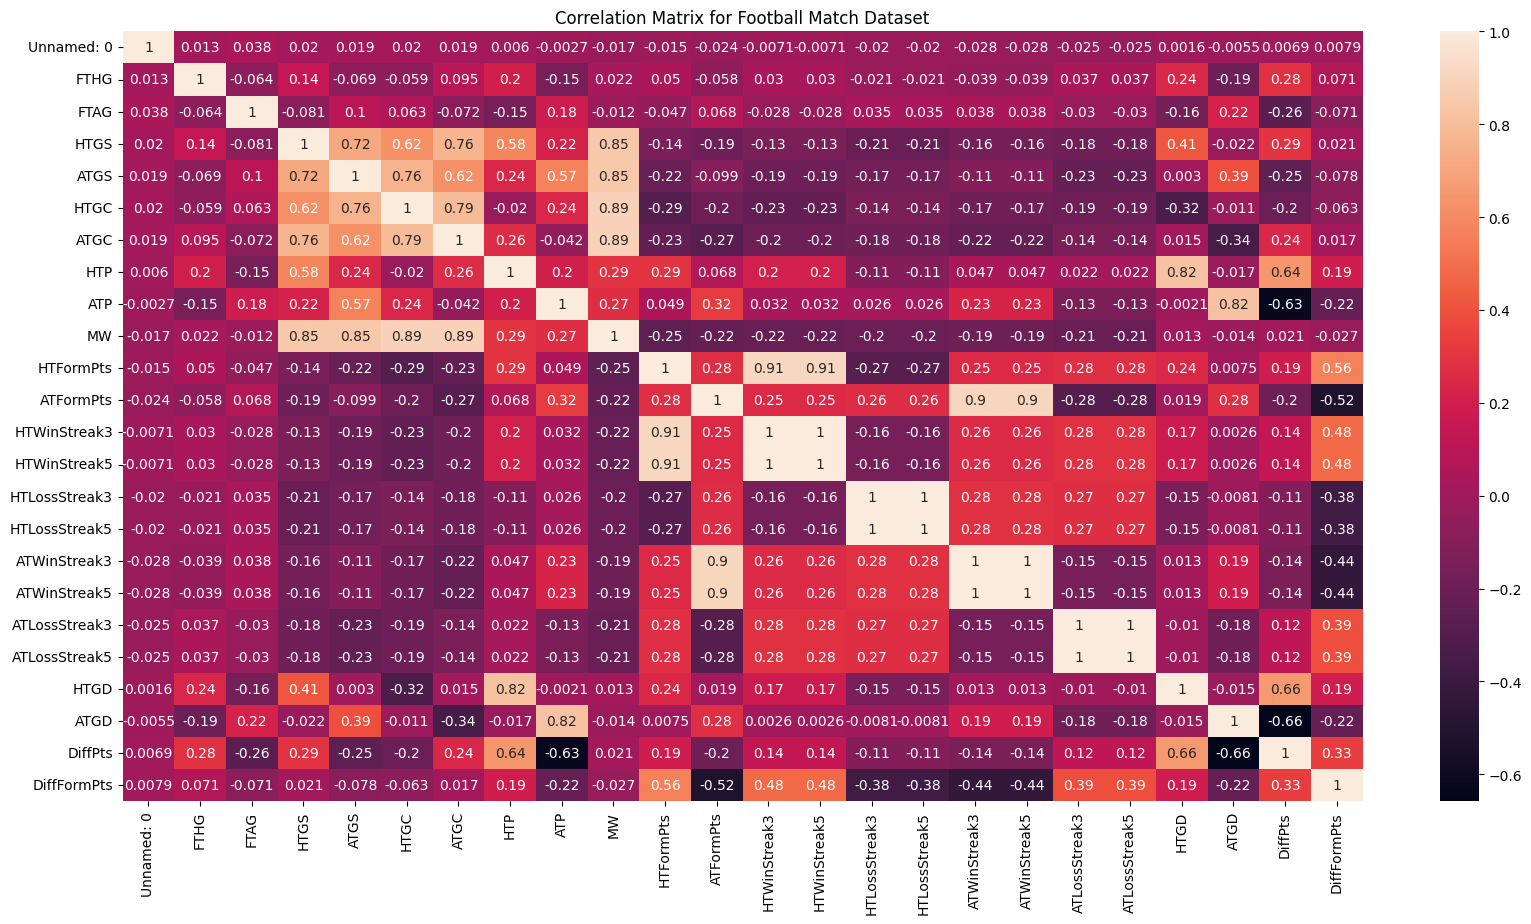

In [23]:
plt.figure(figsize=(20,10)) 
# Select only numeric columns for correlation matrix
numeric_cols = dataset.select_dtypes(include=[np.number])
sns.heatmap(numeric_cols.corr(), annot=True)
plt.title('Correlation Matrix for Football Match Dataset')
plt.show()

POSITIVE CORRELATION: If an increase in feature A leads to increase in feature B, then they are positively correlated. A value 1 means perfect positive correlation.

NEGATIVE CORRELATION: If an increase in feature A leads to decrease in feature B, then they are negatively correlated. A value -1 means perfect negative correlation.

Now lets say that two features are highly or perfectly correlated, so the increase in one leads to increase in the other. This means that both the features are containing highly similar information and there is very little or no variance in information. This is known as MultiColinearity as both of them contains almost the same information.

So do you think we should use both of them as one of them is redundant. While making or training models, we should try to eliminate redundant features as it reduces training time and many such advantages.


In [ ]:
# Remove few column
dataset2 = dataset.copy().drop(columns =['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG',
       'HTGS', 'ATGS', 'HTGC', 'ATGC',
       'HM4', 'HM5','AM4', 'AM5', 'MW', 'HTFormPtsStr',
       'ATFormPtsStr', 'HTFormPts', 'ATFormPts', 'HTWinStreak3',
       'HTWinStreak5', 'HTLossStreak3', 'HTLossStreak5', 'ATWinStreak3',
       'ATWinStreak5', 'ATLossStreak3', 'ATLossStreak5',
       'DiffPts'] )

In [ ]:
dataset2.keys()

In [ ]:
dataset2.head(10)

In [ ]:
#what is the win rate for the home team?

# Total number of matches.
n_matches = dataset2.shape[0]

# Calculate number of features. -1 because we are saving one as the target variable (win/lose/draw)
n_features = dataset2.shape[1] - 1

# Calculate matches won by home team.
n_homewins = len(dataset2[dataset2.FTR == 'H'])

# Calculate win rate for home team.
win_rate = (float(n_homewins) / (n_matches)) * 100

# Print the results
print("Total number of matches: {}".format(n_matches))
print ("Number of features: {}".format(n_features))
print( "Number of matches won by home team: {}".format(n_homewins))
print ("Win rate of home team: {:.2f}%".format(win_rate))

## Visualise the dataset


In [ ]:
# Visualising distribution of data
from pandas.plotting import scatter_matrix

#the scatter matrix is plotting each of the columns specified against each other column.
#You would have observed that the diagonal graph is defined as a histogram, which means that in the 
#section of the plot matrix where the variable is against itself, a histogram is plotted.

#Scatter plots show how much one variable is affected by another. 
#The relationship between two variables is called their correlation
#negative vs positive correlation

#HTGD - Home team goal difference
#ATGD - away team goal difference
#HTP - Home team points
#ATP - Away team points
#DiffFormPts Diff in points
#DiffLP - Differnece in last years prediction

scatter_matrix(dataset2[['HTGD','ATGD','HTP','ATP','DiffFormPts']], figsize=(15,15))

In [ ]:
# Separate into feature set and target variable
#FTR = Full Time Result (H=Home Win, D=Draw, A=Away Win)
X_all = dataset2.drop(['FTR'],1)
y_all = dataset2['FTR']

# Standardising the data.
from sklearn.preprocessing import scale

#Center to the mean and component wise scale to unit variance.
cols = [['HTGD','ATGD','HTP','ATP']]
for col in cols:
    X_all[col] = scale(X_all[col])
    

In [ ]:
#last 3 wins for both sides
X_all.HM1 = X_all.HM1.astype('str')
X_all.HM2 = X_all.HM2.astype('str')
X_all.HM3 = X_all.HM3.astype('str')
X_all.AM1 = X_all.AM1.astype('str')
X_all.AM2 = X_all.AM2.astype('str')
X_all.AM3 = X_all.AM3.astype('str')

#we want continous vars that are integers for our input data, so lets remove any categorical vars
def preprocess_features(X):
    ''' Preprocesses the football data and converts catagorical variables into dummy variables. '''
    
    # Initialize new output DataFrame
    output = pd.DataFrame(index = X.index)

    # Investigate each feature column for the data
    for col, col_data in X.iteritems():

        # If data type is categorical, convert to dummy variables
        if col_data.dtype == object:
            col_data = pd.get_dummies(col_data, prefix = col)
                    
        # Collect the revised columns
        output = output.join(col_data)
    
    return output

X_all = preprocess_features(X_all)
print ("Processed feature columns ({} total features):\n{}".format(len(X_all.columns), list(X_all.columns)))

In [ ]:
X_all.head(10)

## Spliting the dataset


In [ ]:
from sklearn.model_selection import train_test_split

# Shuffle and split the dataset into training and testing set.
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, 
                                                    test_size = 0.3,
                                                    random_state = 2,
                                                    stratify = y_all)

# Applying the Logistic Regression


In [ ]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

In [ ]:
Y_pred = classifier.predict(X_test)

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, Y_pred)

In [ ]:
sns.heatmap(cm, annot=True,fmt='d')

In [ ]:
print(classification_report(y_test, Y_pred))

# Applying the SVM


In [ ]:
#fitting the SVM to the training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf',random_state = 0)
classifier.fit(X_train, y_train)

In [ ]:
#predicting result
Y_pred = classifier.predict(X_test)

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, Y_pred)

In [ ]:
sns.heatmap(cm, annot=True, fmt='d')

In [ ]:
print(classification_report(y_test, Y_pred))

# Applying the RandomForest


In [ ]:
#fitting the RANDOM FOREST to the training se
from sklearn.ensemble import RandomForestClassifier
#classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier = RandomForestClassifier(criterion='gini', 
                             n_estimators=700,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             max_features='auto',
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)
classifier.fit(X_train, y_train)

In [ ]:
#predicting result
Y_pred = classifier.predict(X_test)

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, Y_pred)

In [ ]:
sns.heatmap(cm, annot=True, fmt='d')

In [ ]:
print(classification_report(y_test, Y_pred))

# Applying the XGBoost


In [ ]:
# Fitting XGBoost to the Training set
from xgboost import XGBClassifier
classifier = XGBClassifier(seed=82)
classifier.fit(X_train, y_train)

In [ ]:
# Predicting the Test set results
Y_pred = classifier.predict(X_test)

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, Y_pred)

In [ ]:
sns.heatmap(cm, annot=True,fmt='d')

In [ ]:
print(classification_report(y_test, Y_pred))

**Clearly XGBoost seems like the best model as it has the highest F1 score and accuracy score on the test set.**


# Tuning the parameters of XGBoost.


In [ ]:
# TODO: Import 'GridSearchCV' and 'make_scorer'
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score
import xgboost as xgb

# TODO: Create the parameters list you wish to tune
parameters = { 'learning_rate' : [0.1],
               'n_estimators' : [40],
               'max_depth': [3],
               'min_child_weight': [3],
               'gamma':[0.4],
               'subsample' : [0.8],
               'colsample_bytree' : [0.8],
               'scale_pos_weight' : [1],
               'reg_alpha':[1e-5]
             }  

def predict_labels(clf, features, target):
    ''' Makes predictions using a fit classifier based on F1 score. '''

    y_pred = clf.predict(features)
    
    return f1_score(target, y_pred, pos_label='H'), sum(target == y_pred) / float(len(y_pred))


# TODO: Initialize the classifier
clf = xgb.XGBClassifier(seed=2)

# TODO: Make an f1 scoring function using 'make_scorer' 
f1_scorer = make_scorer(f1_score,pos_label='H')

# TODO: Perform grid search on the classifier using the f1_scorer as the scoring method
grid_obj = GridSearchCV(clf,
                        scoring=f1_scorer,
                        param_grid=parameters,
                        cv=5)

# TODO: Fit the grid search object to the training data and find the optimal parameters
grid_obj = grid_obj.fit(X_train,y_train)

# Get the estimator
clf = grid_obj.best_estimator_
print(clf)

# Report the final F1 score for training and testing after parameter tuning
f1, acc = predict_labels(clf, X_train, y_train)
print( "F1 score and accuracy score for training set: {:.4f} , {:.4f}.".format(f1 , acc))
    
f1, acc = predict_labels(clf, X_test, y_test)
print("F1 score and accuracy score for test set: {:.4f} , {:.4f}.".format(f1 , acc))

#### Probably little best!!!!!!!!


Accuracy is not soo good but it can improved.

Actually it only depend upon past year match dataset,we can improve the accuracy by putting twitter data related to match, sentiment analysis, chances of player to play a specific match,player performace in recent series,etc..


I hope you find this kernel useful and enjoyable. If so please upVote

Your comments and feedback are most welcome.
